In [40]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('Data/Dataset.csv')
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

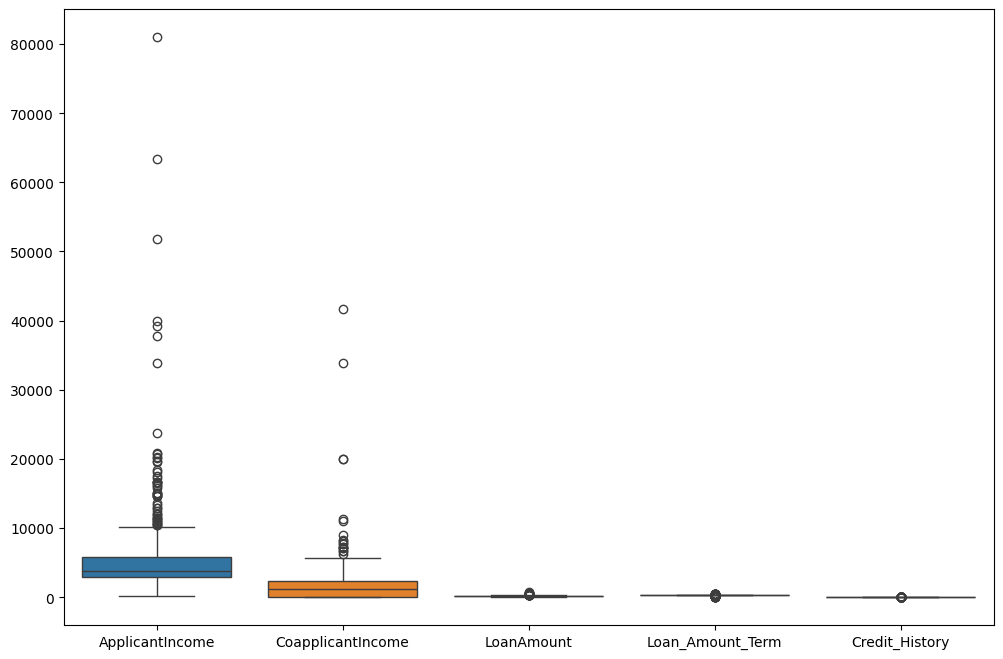

In [43]:
## checking for ouliers
plt.figure(figsize=(12, 8))
sns.boxplot(data = df)

In [44]:
## filling the null value of numerical data type
df["LoanAmount"] = df['LoanAmount'].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df['Loan_Amount_Term'].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df['Credit_History'].fillna(df["Credit_History"].mean())


In [45]:
## filling the null value of object data type
df["Gender"] = df['Gender'].fillna(df["Gender"].mode()[0])
df["Married"] = df['Married'].fillna(df["Married"].mode()[0])
df["Credit_History"] = df['Credit_History'].fillna(df["Credit_History"].mode()[0])
df["Self_Employed"] = df['Self_Employed'].fillna(df["Self_Employed"].mode()[0])
df["Dependents"] = df['Dependents'].fillna(df["Dependents"].mode()[0])

In [46]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people of who took loan by "gender"
Gender
Male      502
Female    112
Name: count, dtype: int64


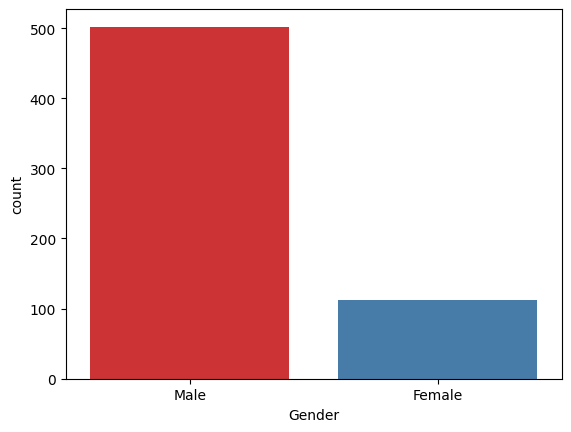

In [47]:
print('Number of people of who took loan by "gender"')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set1');

Number of people of took loan by "marriage"
Married
Yes    401
No     213
Name: count, dtype: int64


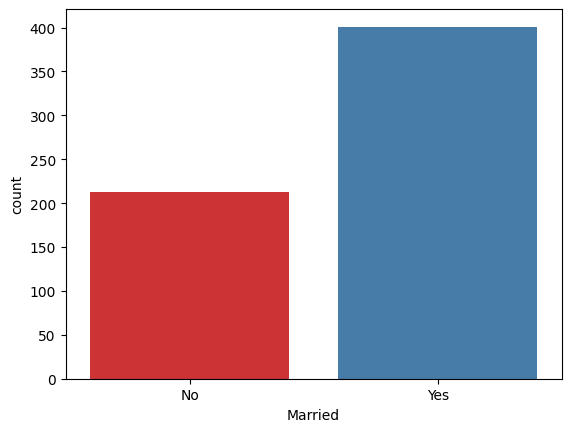

In [48]:
print('Number of people of took loan by "marriage"')
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='Set1');

Number of people of took loan by "education"
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

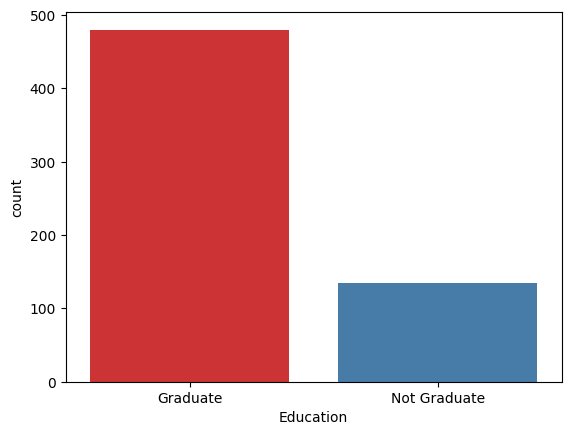

In [49]:
print('Number of people of took loan by "education"')
print(df['Education'].value_counts())
sns.countplot(x='Education', data=df, palette='Set1')

In [50]:
corr = df.select_dtypes(include=['float64', 'int64', ]).corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


In [51]:
## FE - creating a new column - 'Total_Applicant_Income'
df['TotalApplicantIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

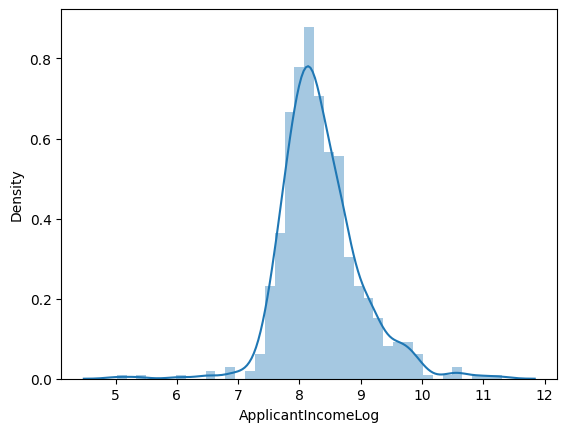

In [52]:
## log transformation
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomeLog'])


In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,ApplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

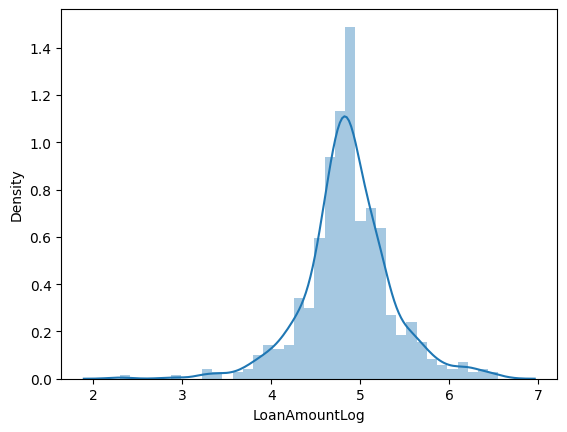

In [54]:
## log transformation
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountLog'])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

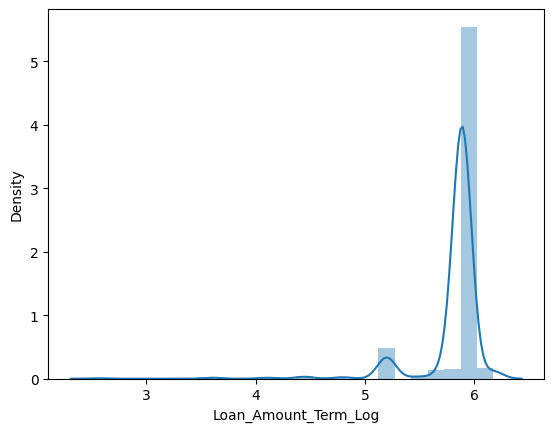

In [55]:
## log transformation
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_Log'])

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

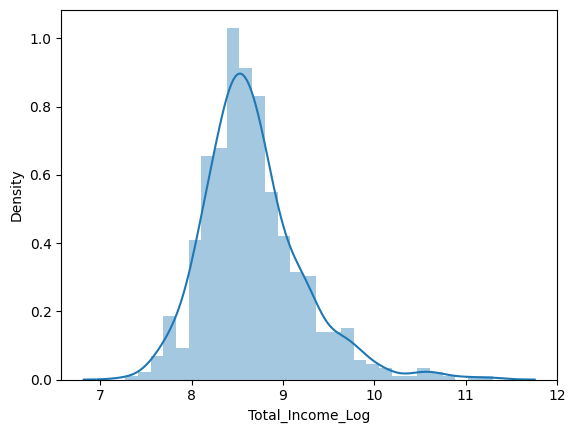

In [56]:
## log transformation
df['Total_Income_Log'] = np.log(df['TotalApplicantIncome'] + 1)
sns.distplot(df['Total_Income_Log'])

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalApplicantIncome,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [58]:
## dropping unneccessary colmuns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalApplicantIncome', 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender', 'Married', 'Education', 'Property_Area', 'Loan_Status', 'Dependents', 'Self_Employed']
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [60]:
## spliting dependent and independent feature
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [61]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [62]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int32  
 1   Married               614 non-null    int32  
 2   Dependents            614 non-null    int32  
 3   Education             614 non-null    int32  
 4   Self_Employed         614 non-null    int32  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int32  
 7   Loan_Status           614 non-null    int32  
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
X_train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
92,1,1,2,1,0,1.000000,2,8.093768,4.406719,5.888878,8.535819
304,1,0,0,0,0,1.000000,0,8.294300,4.948760,5.888878,8.779711
68,1,1,3,1,1,1.000000,2,8.867991,4.836282,4.110874,8.867991
15,1,0,0,0,0,1.000000,2,8.507345,4.836282,5.888878,8.507345
211,1,1,3,0,0,0.000000,1,8.140607,4.859812,5.888878,8.451267
268,0,0,0,0,0,1.000000,0,8.137103,4.912655,5.888878,8.137103
88,1,0,0,0,0,1.000000,2,9.055673,5.351858,5.888878,9.055673
514,1,0,0,0,0,1.000000,0,8.668368,5.743003,5.888878,9.157151
117,1,1,1,0,0,0.842199,2,7.703008,4.454347,5.888878,8.192294
395,1,1,2,0,0,0.842199,1,8.094684,4.912655,5.888878,8.232440


In [67]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
350,1,1,0,0,0,1.000000,1,9.114270,5.433722,5.888878,9.114270
377,1,1,0,0,0,0.842199,1,8.368925,4.875197,5.888878,8.368925
163,1,1,2,0,0,1.000000,0,8.335192,5.068904,5.888878,8.633197
609,0,0,0,0,0,1.000000,0,7.972811,4.276666,5.888878,7.972811
132,1,0,0,0,0,1.000000,1,7.908019,4.262680,5.888878,7.908019
...,...,...,...,...,...,...,...,...,...,...,...
535,1,0,0,1,0,1.000000,0,7.844241,4.844187,5.888878,8.432289
468,0,1,2,1,0,1.000000,1,5.351858,4.595120,5.888878,8.048149
582,0,1,0,0,0,1.000000,1,8.060540,3.610918,5.888878,8.060540
291,1,1,2,0,0,0.000000,1,8.389587,4.852030,5.888878,8.389587


In [68]:
## Logistics Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_model1)

In [69]:
print(round(accuracy*100, 2))

77.27


In [70]:
score = cross_val_score(model1, X, y, cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [71]:
print(np.mean(score)*100)

80.9462881514061


In [72]:
## Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(y_pred_model2, y_test)
print('Accuracy score of DTM', round(accuracy*100, 2))

Accuracy score of DTM 72.08


In [73]:
score = cross_val_score(model2, X, y, cv=5)
print('Cross validation score of DTM:', round(np.mean(score)*100, 2))

Cross validation score of DTM: 69.55


In [74]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_pred_model3, y_test)
print('Accuracy score of RFM', round(accuracy*100, 2))

Accuracy score of RFM 79.22


In [75]:
## K-Neighbor Classifier
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_pred_model4, y_test)
print('Accuracy score of KNM', round(accuracy*100, 2))

Accuracy score of KNM 71.43


In [76]:
score = cross_val_score(model4, X, y, cv=3)
print('Cross validation score of KNM:', round(np.mean(score)*100, 2))

Cross validation score of KNM: 73.94


In [77]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f'Classification Report for {model_name}:\n{report}\n')
    
generate_classification_report(model1, y_test, y_pred_model1)
generate_classification_report(model2, y_test, y_pred_model2)
generate_classification_report(model3, y_test, y_pred_model3)
generate_classification_report(model4, y_test, y_pred_model4)

Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.61      0.56      0.58        54
           1       0.77      0.81      0.79       100

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.89      0.46      0.61        54
           1       0.77      0.97      0.86       100

    accuracy                

In [78]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -

In [79]:
from imblearn.over_sampling import RandomOverSampler

In [80]:
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Loan_Status')], axis=1)

In [81]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,0,0,1,0,1.0,2,7.601402,4.859812,5.888878,7.601402
840,1,0,0,0,0,1.0,0,8.668368,5.743003,5.888878,9.157151
841,1,0,0,0,0,1.0,2,8.184235,4.574711,5.888878,8.184235
842,0,0,1,1,0,1.0,0,8.435332,4.406719,5.888878,8.435332


In [82]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [83]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [84]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [85]:
## Logistics Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train, y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_pred_model1)
accuracy*100

69.66824644549763

In [86]:
## Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train, y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_pred_model2, y_resampled_test)
print('Accuracy score of DTM', round(accuracy*100, 2))

Accuracy score of DTM 83.89


In [87]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train, y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_pred_model3, y_resampled_test)
print('Accuracy score of RFM', round(accuracy*100, 2))

Accuracy score of RFM 84.36


In [88]:
## K-Neighbor Classifier
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train, y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_pred_model4, y_resampled_test)
print('Accuracy score of KNM', round(accuracy*100, 2))

Accuracy score of KNM 67.77


In [89]:
def generate_classification_report(model_name, y_resampled_test, y_pred):
    report = classification_report(y_resampled_test, y_pred)
    print(f'Classification Report for {model_name}:\n{report}\n')
    
generate_classification_report(model1, y_resampled_test, y_pred_model1)
generate_classification_report(model2, y_resampled_test, y_pred_model2)
generate_classification_report(model3, y_resampled_test, y_pred_model3)
generate_classification_report(model4, y_resampled_test, y_pred_model4)

Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       114
           1       0.84      0.80      0.82        97

    accuracy                           0.84       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.84      0.84      0.84       211


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       114
           1       0.80      0.88      0.84        97

    accuracy                

In [90]:
# What i added
import joblib

model_filename = "Random forest model.h5"
# Load the model from the file
with open (model_filename, "wb") as model_file:
    joblib.dump(model3, model_file)

    print(f"the model has been saved to {model_filename}")


the model has been saved to Random forest model.h5
